# FUNGI

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [2]:
#import packages
import os
import dokdo
import qiime2 as q2
import pandas as pd
import seaborn as sns
import plotnine as p9
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins import feature_table

In [3]:
# import data
denoisetable_fun = q2.Artifact.load('./results/denoisetable_fun.qza')
rep_seqs_fun = q2.Artifact.load('./results/rep_seqs_fun.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

In [4]:
# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_fun,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: ee8e7c33-6548-495c-b3ad-ee15465f12bb>

### TREE

In [5]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_fun,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-uln_0v31/c6be4a17-54c9-4833-ab48-710ef30df0c2/data/dna-sequences.fasta



inputfile = orig
118 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  101 / 118 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  110 / 118
done.

Progressive alignment 1/2... 
STEP    12 / 117 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   117 / 117 (thread    0)
done.

Making a distance matrix from msa.. 
  100 / 118 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  110 / 118
done.

Progressive alignment 2/2... 
STEP    22 / 117 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   117 / 117 (thread    0)
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto inpu

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-v2diqyzq/da79c829-7b94-4439-bbbb-8cb2d02553cb/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-v2diqyzq/da79c829-7b94-4439-bbbb-8cb2d02553cb/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.03 seconds
Refining topology: 27 rounds ME-NNIs, 2 rounds ME-SPRs, 14 rounds ML-NNIs
      0.11 seconds: SPR round   1 of   2, 101 of 232 nodes
      0.24 seconds: SPR round   2 of   2, 101 of 232 nodes
Total branch-length 8.254 after 0.31 sec
      0.46 seconds: ML NNI round 1 of 14, 101 of 115 splits, 23 changes (max delta 8.570)
ML-NNI round 1: LogLk = -11498.492 NNIs 28 max delta 8.57 Time 0.48
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 1.027 so that average rate = 1.0
CAT-based log-likelihoods may not be compar

### ALPHA AND BETA DIVERSITY

In [6]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_fun,
#     max_depth = 35000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [7]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_35000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_35000.qzv')

In [8]:
# #this step can take some time
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# 
# ax.set_xlabel('Globina sekvenciranja')
# ax.set_ylabel('Število ASV')
# 
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/fun_alpha_rarefaction_plot_35k.png')

### ALPHA DIVERSITY

In [9]:
from qiime2.plugins import feature_table

# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_fun,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 11952d84-20a3-4586-9db5-e739c118839a>

In [10]:
# set sampling_depth based on alpha rarefacation curve
depth = 8341
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_fun,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-sm0w0q61/eed6548e-0041-46df-bb02-930e7753fbac/data/feature-table.biom -t /tmp/qiime2-archive-2fiyevhu/494d9605-2e42-4ba3-987e-365d633c1753/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-atiiqy6y

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-sm0w0q61/eed6548e-0041-46df-bb02-930e7753fbac/data/feature-table.biom -t /tmp/qiime2-archive-2fiyevhu/494d9605-2e42-4ba3-987e-365d633c1753/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-4lbv0h_q

Running external command line application. This may print messages to stdout and/

/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.004014652955213154 and the largest is 0.7438628146447721.


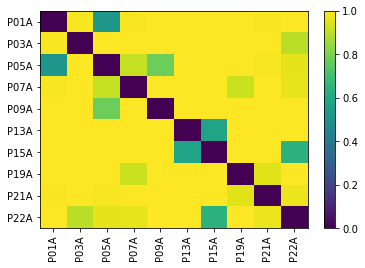

In [11]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

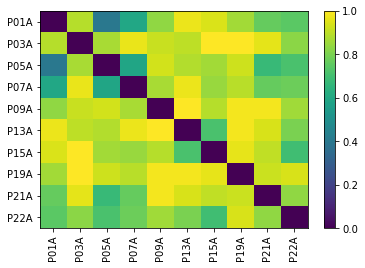

In [12]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [13]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 2337f08b-73ad-4c42-ad0c-74930d06b158>

In [14]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#    table = denoisetable_fun,
#    phylogeny = rooted_tree,
#    max_depth = depth,
#    metadata = sample_metadata,
#    metrics = {'chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance'},
#    steps =  100
# )
# alpha_rarefaction.visualization.save('./results/alpha_diversity_new.qzv')

In [15]:
#alpha_rarefaction.visualization.save('./results/alpha_diversity.qzv')
alpha_rarefaction = q2.Visualization.load('./results/alpha_diversity_new.qzv')

In [16]:
alpha_rarefaction

<visualization: Visualization uuid: 74caa355-924d-458a-95c8-df801721c727>

In [17]:
metrics = ['chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,chao1,simpson,simpson_e,observed_features,dominance
Sample ID,,,,,
P01A,26.60,0.290852,0.054236,26.0,0.709148
P03A,4.00,0.107780,0.280200,4.0,0.892220
P05A,23.00,0.721088,0.162971,22.0,0.278912
P07A,31.25,0.696036,0.126533,26.0,0.303964
P09A,9.00,0.080464,0.120834,9.0,0.919536
P13A,8.00,0.109570,0.160436,7.0,0.890430
P15A,11.00,0.533689,0.194954,11.0,0.466311
P19A,50.00,0.942257,0.368472,47.0,0.057743
P21A,50.00,0.953573,0.458281,47.0,0.046427


In [18]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
#ndf["color"] = ndf.groupby("population").ngroup()
#ndf.reset_index().plot.scatter("index", "observed_features", c="color", cmap=plt.cm.viridis)

In [19]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type="Število ASV"')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type="Chao1"')

df = pd.concat([df1, df2])

In [20]:
df = df.rename(columns={'population': 'Filogenetska linija', 'year': 'Leto', 'value': 'Število ASV', 'type': 'Metrika'})
df.index.name = 'Osebek'

/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./results/fungi_obs-feat_chao1.png


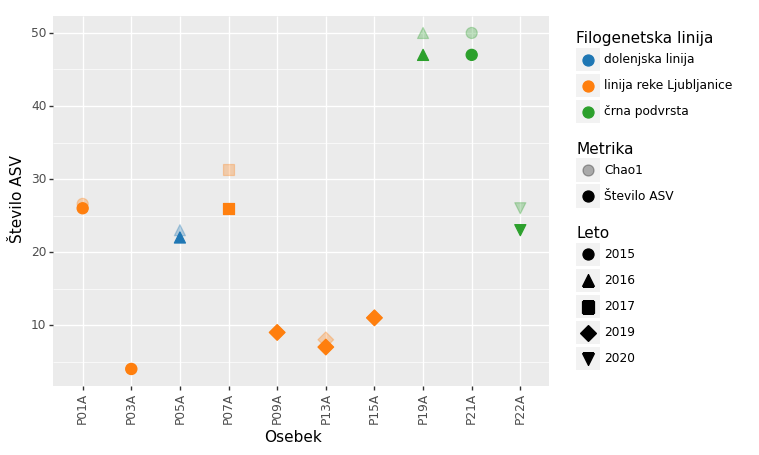

<ggplot: (8727768892395)>

In [21]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='Število ASV', shape='Leto', color='Filogenetska linija', alpha='Metrika'))
    + geom_point(size=4)
    + labs(x='Osebek', y='Število ASV')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.3, 1.0])
    + theme(axis_text_x=element_text(rotation=90))
)

p.save('./results/fungi_obs-feat_chao1.png')

p

In [22]:
ndf = ndf.rename(columns={'population': 'Filogenetska linija', 'year': 'Leto'})
ndf.index.name = 'Osebek'
ndf

,chao1,simpson,simpson_e,observed_features,dominance,sample,location,origin,Leto,parkelj,specimen,Filogenetska linija
Osebek,,,,,,,,,,,,
P01A,26.60,0.290852,0.054236,26.0,0.709148,P01A,Planinska_jama,Paa200_t0,2015,no,Paa200,linija reke Ljubljanice
P03A,4.00,0.107780,0.280200,4.0,0.892220,P03A,Planinska_jama,Paa201_t0,2015,no,Paa201,linija reke Ljubljanice
P05A,23.00,0.721088,0.162971,22.0,0.278912,P05A,Stobe,Paa204_t10d,2016,no,Paa204,dolenjska linija
P07A,31.25,0.696036,0.126533,26.0,0.303964,P07A,Planinska_jama,Paa209_t0,2017,no,Paa209,linija reke Ljubljanice
P09A,9.00,0.080464,0.120834,9.0,0.919536,P09A,Planinska_jama,Paa210_t0,2019,no,Paa210,linija reke Ljubljanice
P13A,8.00,0.109570,0.160436,7.0,0.890430,P13A,Planinska_jama,Paa219_t0,2019,no,Paa219,linija reke Ljubljanice
P15A,11.00,0.533689,0.194954,11.0,0.466311,P15A,Planinska_jama,Paa220_t0,2019,no,Paa220,linija reke Ljubljanice
P19A,50.00,0.942257,0.368472,47.0,0.057743,P19A,Obrsec,PB271_parkelj,2016,yes,PB271,črna podvrsta
P21A,50.00,0.953573,0.458281,47.0,0.046427,P21A,Jelsevnik,PB644_parkelj,2015,yes,PB644,črna podvrsta


/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./results/fungi_simpson_e.png


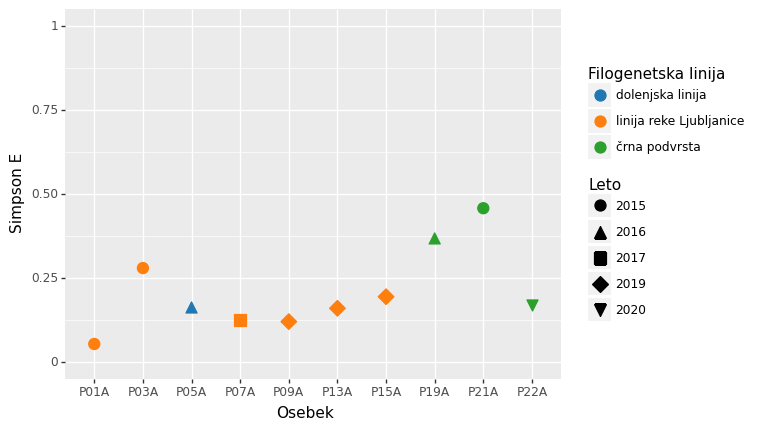

<ggplot: (8727675899850)>

In [23]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='Leto', color='Filogenetska linija'))
    + geom_point(size=4)
    + labs(x='Osebek', y='Simpson E')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)


simpson.save('./results/fungi_simpson_e.png')
simpson 

In [24]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [25]:
# # simpson viz
# visualizations['simpson']

# # observed_features viz
# visualizations['observed_features']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # chao1 viz
# visualizations['chao1']

# # shannon viz
# visualizations['shannon']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

### BETA DIVERSITY

In [26]:
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_fun,
    metadata = sample_metadata,
    where = "[population] IN ('Linija reke Ljubljanice', 'Črna podvrsta')"
)

In [27]:
# 2016 pade ven
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_fun,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2019')"
)

In [28]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 8367
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

ValueError: The rarefied table contains no samples or features. Verify your table is valid and that you provided a shallow enough sampling depth.

In [ ]:
depth = 8367
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

#### PERMANOVA

In [ ]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization

In [ ]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

#### ANOSIM

In [ ]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

In [ ]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization